# IMPORTAÇÃO DE BIBLIOTECAS

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Configuração visual para deixar os gráficos bonitos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# CARREGAMENTO E LIMPEZA INICIAL

In [17]:
# Carregar o dataset
df = pd.read_csv('Telecom_X_Limpo.csv')

# 1. Eliminar colunas que não trazem valor (ID_Cliente)
# O ID é apenas um identificador, não influencia se a pessoa vai cancelar ou não.
if 'ID_Cliente' in df.columns:
    df = df.drop('ID_Cliente', axis=1)

# 2. Transformar a variável alvo 'Churn' em numérica (0 e 1)
# Mapeamos: 'Sim' -> 1 (Churn/Cancelou), 'Não' -> 0 (Não Cancelou)
mapa_churn = {'Sim': 1, 'Não': 0}
df['Churn'] = df['Churn'].map(mapa_churn)

# Verificar se sobrou algum valor nulo ou erro de tipo em 'Cobranca_Total'
# O parâmetro 'coerce' transforma textos que não são números em NaN (Not a Number)
df['Cobranca_Total'] = pd.to_numeric(df['Cobranca_Total'], errors='coerce')
df = df.dropna() # Remove linhas com erro, se houver (segurança extra)

# Visualizar as primeiras linhas e tipos
print("Shape do dataset:", df.shape)
display(df.head())
print(df.dtypes)

Shape do dataset: (7043, 21)


,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,...,Não,Sim,Sim,Não,One year,Sim,Mailed check,65.6,593.30,2.19
1,0,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,...,Não,Não,Não,Sim,Month-to-month,Não,Mailed check,59.9,542.40,2.00
2,1,Masculino,Não,Não,Não,4,Sim,Não,Fiber optic,Não,...,Sim,Não,Não,Não,Month-to-month,Sim,Electronic check,73.9,280.85,2.46
3,1,Masculino,Sim,Sim,Não,13,Sim,Não,Fiber optic,Não,...,Sim,Não,Sim,Sim,Month-to-month,Sim,Electronic check,98.0,1237.85,3.27
4,1,Feminino,Sim,Sim,Não,3,Sim,Não,Fiber optic,Não,...,Não,Sim,Sim,Não,Month-to-month,Sim,Mailed check,83.9,267.40,2.80


Churn                     int64
Genero                   object
Idoso                    object
Parceiro                 object
Dependentes              object
Meses_Contrato            int64
Servico_Telefonico       object
Multiplas_Linhas         object
Servico_Internet         object
Seguranca_Online         object
Backup_Online            object
Protecao_Dispositivo     object
Suporte_Tecnico          object
Streaming_TV             object
Streaming_Filmes         object
Contrato                 object
Fatura_Digital           object
Metodo_Pagamento         object
Cobranca_Mensal         float64
Cobranca_Total          float64
Contas_Diarias          float64
dtype: object


# ANÁLISE DE DESBALANCEAMENTO

--- Proporção de Churn ---
Não Churn (0): 73.46%
Churn (1):     26.54%


C:\Users\gabri\AppData\Local\Temp\ipykernel_3404\1043626895.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


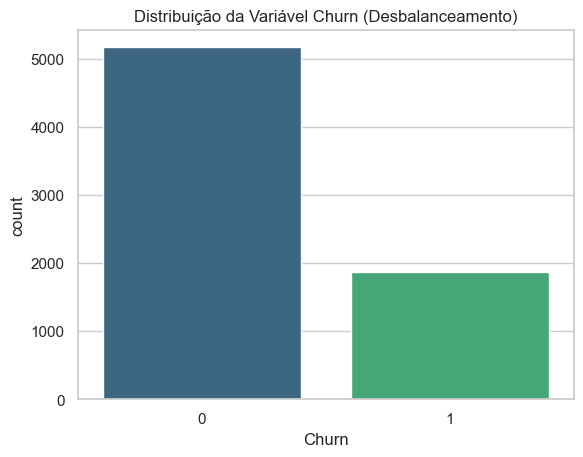

In [18]:
contagem = df['Churn'].value_counts(normalize=True) * 100
print("--- Proporção de Churn ---")
print(f"Não Churn (0): {contagem[0]:.2f}%")
print(f"Churn (1):     {contagem[1]:.2f}%")

# Plotar o desbalanceamento
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribuição da Variável Churn (Desbalanceamento)')
plt.show()

# CORRELAÇÃO

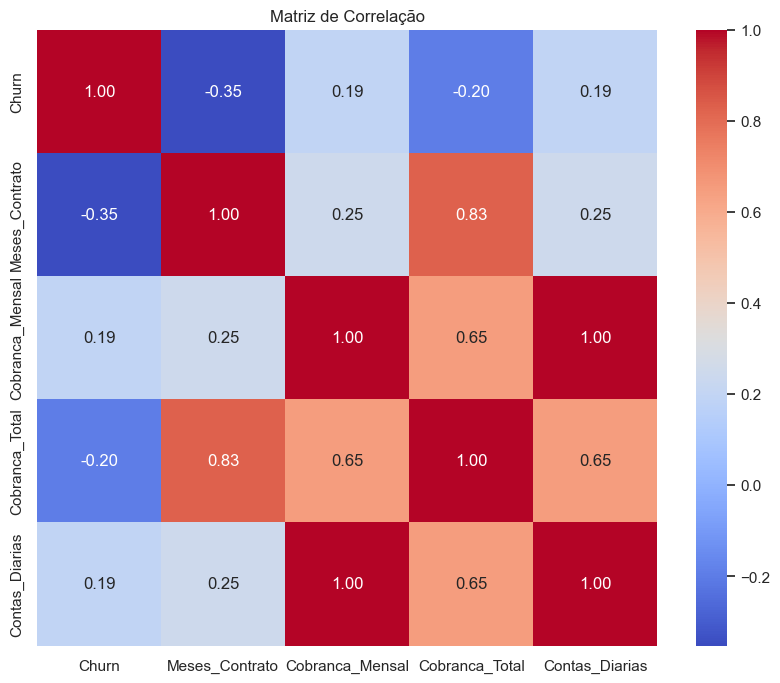

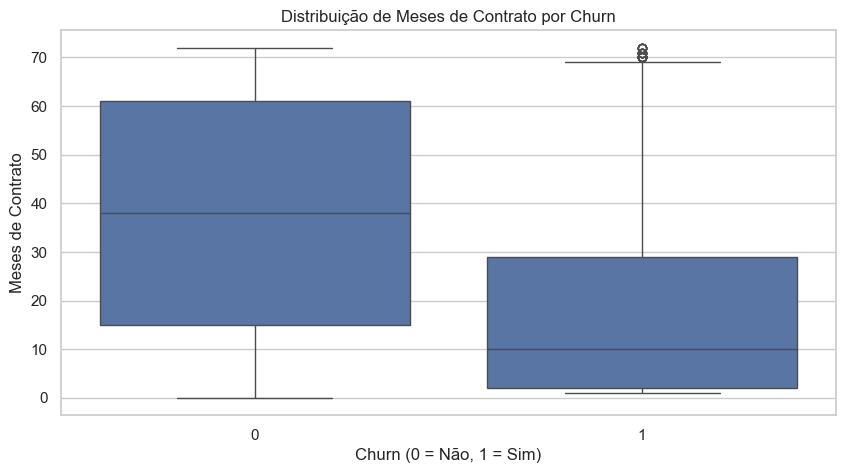

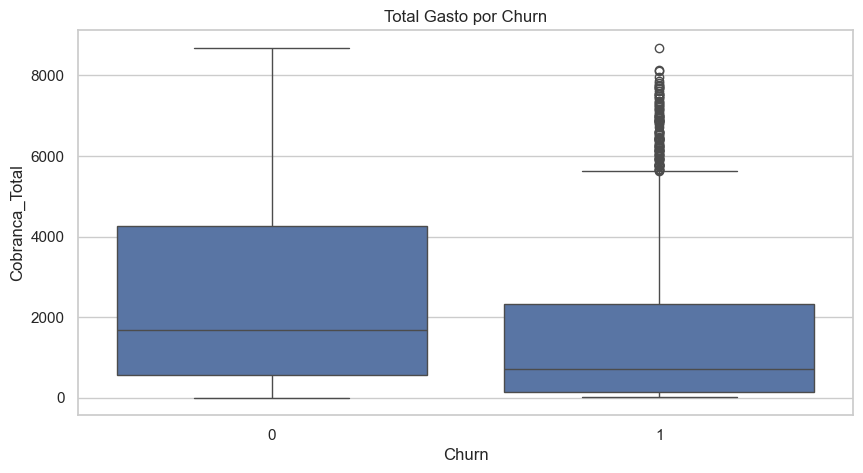

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- ANÁLISE EXPLORATÓRIA  ---

# 1. Matriz de Correlação
plt.figure(figsize=(10, 8))


correlacao = df.select_dtypes(include=[np.number]).corr()

# Desenhar o mapa de calor
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# 2. Análise Visual: Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Meses_Contrato', data=df)
plt.title('Distribuição de Meses de Contrato por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()

# 3. Análise Visual: Total Gasto x Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Cobranca_Total', data=df)
plt.title('Total Gasto por Churn')
plt.show()

# PRÉ-PROCESSAMENTO

In [20]:
# 1. One-Hot Encoding para variáveis categóricas
# drop_first=True remove uma das colunas para evitar multicolinearidade
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Separar Features
X = df_encoded.drop('Churn', axis=1) # Tudo, menos o alvo
y = df_encoded['Churn']             # Apenas o alvo

# 3. Divisão Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (4930, 31), Teste: (2113, 31)


# BALANCEAMENTO SMOTE E PADRONIZAÇÃO

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# 1. Verificar desbalanceamento inicial
print("Distribuição antes do SMOTE:")
print(y_train.value_counts(normalize=True))

# 2. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribuição após SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# 3. Normalização
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


X_train_rf = X_train_resampled
y_train_rf = y_train_resampled

Distribuição antes do SMOTE:
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Distribuição após SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

# TREINO E VALIDAÇÃO DOS MODELOS

--- Avaliação: Regressão Logística ---
Acurácia: 0.7837

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.62      0.61       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.79      2113



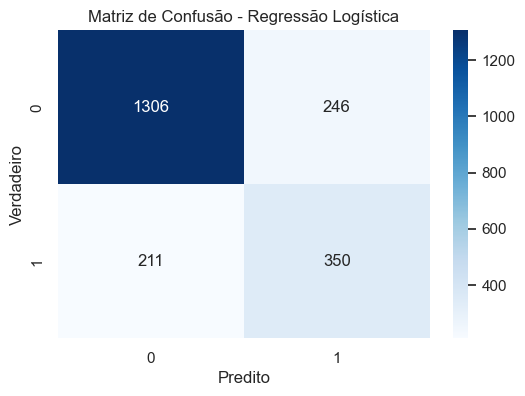

--------------------------------------------------
--- Avaliação: Random Forest ---
Acurácia: 0.7766

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1552
           1       0.59      0.53      0.56       561

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.78      0.77      2113



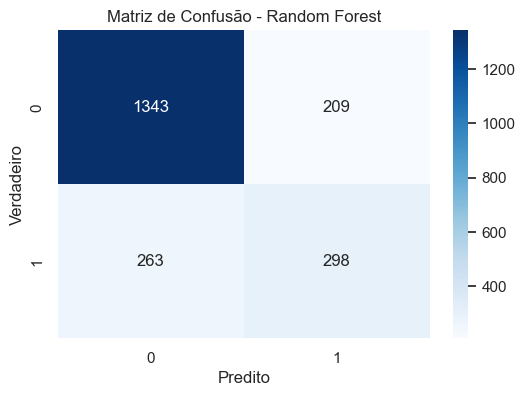

--------------------------------------------------


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


def avaliar_modelo(nome_modelo, y_verdadeiro, y_predito):
    print(f"--- Avaliação: {nome_modelo} ---")
    print(f"Acurácia: {accuracy_score(y_verdadeiro, y_predito):.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_verdadeiro, y_predito))
    
    # Matriz de Confusão Visual
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_verdadeiro, y_predito), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.show()
    print("-" * 50)

# --- MODELO 1: REGRESSÃO LOGÍSTICA ---

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_resampled)

# Previsão
y_pred_log = log_reg.predict(X_test_scaled)

# --- MODELO 2: RANDOM FOREST ---

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf) 


y_pred_rf = rf_model.predict(X_test) 

# Avaliar ambos
avaliar_modelo("Regressão Logística", y_test, y_pred_log)
avaliar_modelo("Random Forest", y_test, y_pred_rf)

# IMPORTANCIA DAS VARIAVEIS E CONCLUSÃO

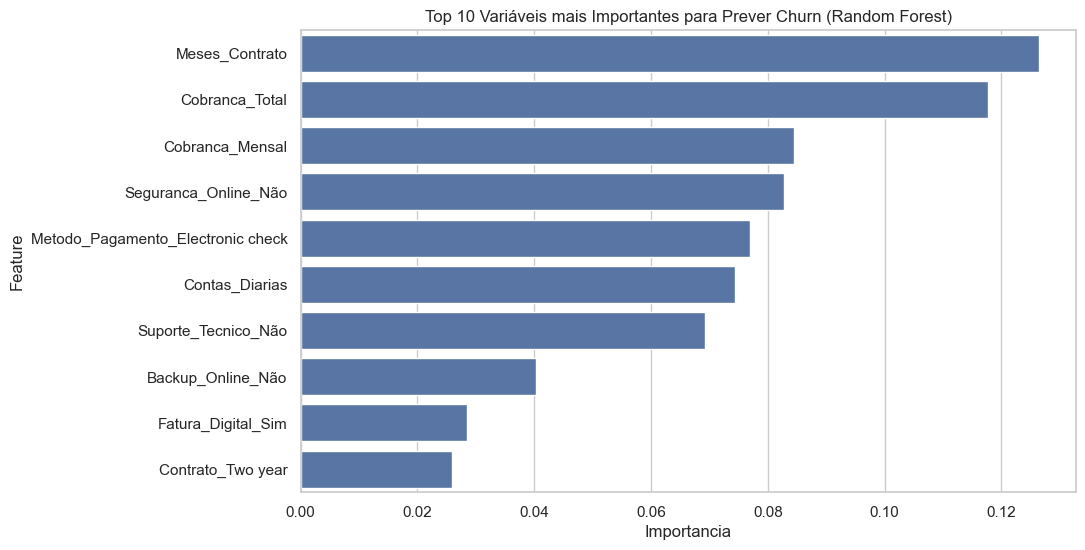


Top 5 Fatores que AUMENTAM o Risco (Regressão Logística):
                         Feature  Coeficiente
12          Servico_Internet_Não     4.081247
10          Multiplas_Linhas_Sim     2.048559
9           Multiplas_Linhas_Não     1.728310
11  Servico_Internet_Fiber optic     1.602533
19           Suporte_Tecnico_Não     1.491346

Top 5 Fatores que DIMINUEM o Risco (Protegem contra Churn):
                   Feature  Coeficiente
26       Contrato_Two year    -0.397776
8   Servico_Telefonico_Sim    -0.503186
3           Contas_Diarias    -1.478498
1          Cobranca_Mensal    -1.507460
0           Meses_Contrato    -2.159237


In [23]:
feature_names = X.columns
importances = rf_model.feature_importances_

# Criar um DataFrame para visualizar melhor
df_importancia = pd.DataFrame({'Feature': feature_names, 'Importancia': importances})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Feature', data=df_importancia.head(10))
plt.title('Top 10 Variáveis mais Importantes para Prever Churn (Random Forest)')
plt.show()

# --- ANÁLISE DE COEFICIENTES ---
coeficientes = pd.DataFrame({'Feature': feature_names, 'Coeficiente': log_reg.coef_[0]})
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)

print("\nTop 5 Fatores que AUMENTAM o Risco (Regressão Logística):")
print(coeficientes.head(5))

print("\nTop 5 Fatores que DIMINUEM o Risco (Protegem contra Churn):")
print(coeficientes.tail(5))

# 📝 Resumo da Arquitetura e Lógica Implementada

Limpeza de Dados: Iniciei o processo removendo colunas irrelevantes, como identificadores únicos (IDs), para garantir que o modelo não aprendesse padrões ruidosos. Também converti a variável alvo (target) para formato numérico (0 e 1), permitindo o processamento matemático.

Encoding (Transformação): Como os algoritmos de Machine Learning operam exclusivamente com números, apliquei técnicas de One-Hot Encoding. Dessa forma, transformei variáveis categóricas (como "Gênero" ou "Método de Pagamento") em vetores binários compreensíveis para o modelo.

Divisão Treino/Teste (Split): Separei estrategicamente 30% dos dados para o conjunto de teste. Mantive essa parcela "invisível" durante o treinamento para simular um cenário real e validar se o modelo consegue generalizar o aprendizado, evitando apenas "decorar" os dados (overfitting).

Balanceamento (SMOTE): Identifiquei um desequilíbrio nas classes e apliquei o algoritmo SMOTE (Synthetic Minority Over-sampling Technique) apenas nos dados de treino. Isso gerou exemplos sintéticos de clientes que cancelaram, "ensinando" o modelo a dar a devida importância à evasão, que era a classe minoritária.

Padronização (Scaling): Para modelos sensíveis à distância, como a Regressão Logística, padronizei os dados colocando-os na mesma escala. Isso impediu que variáveis com valores altos (como "Cobrança Total") dominassem o cálculo e enviesassem o resultado.

Critérios de Avaliação: Não me limitei à acurácia. Avaliei os modelos com foco no Recall (pois é crucial detectar quem vai cancelar) e analisei a Matriz de Confusão para entender exatamente onde o modelo acerta e onde erra.

# 🚀 Minha Análise e Conclusões

Nesta etapa final, estou focando nos seguintes pontos para consolidar a estratégia:

Verificação de Overfitting: Estou comparando o desempenho entre treino e teste. Se o modelo (especialmente o Random Forest) apresentar uma acurácia excelente no treino, mas cair muito no teste, saberei que ele perdeu a capacidade de generalização e precisará de ajustes.

Foco no Recall: Estou priorizando o modelo que apresenta o melhor Recall para a classe "Churn". No contexto do negócio, é preferível prever um falso positivo (achar que vai cancelar e não cancelar) do que perder um cliente sem aviso prévio.

Insights de Negócio: Ao analisar a importância das variáveis , observei que fatores como Meses_Contrato e Tipo_Contrato possuem alto impacto. Com base nisso, minha recomendação estratégica será focar em migrar clientes de contratos mensais para anuais, pois isso reduz drasticamente a probabilidade de evasão.